In [1]:
!git clone https://github.com/febse/ta2025.git repo

Cloning into 'repo'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (266/266), done.
remote: Compressing objects: 100% (196/196), done.
remote: Total 266 (delta 112), reused 196 (delta 56), pack-reused 0 (from 0)
Receiving objects: 100% (266/266), 10.27 MiB | 9.28 MiB/s, done.
Resolving deltas: 100% (112/112), done.


# Linear Algebra Essentials

Embed a local video:

{{< video videos/VectorMovement.mp4 >}}

## Vectors: Arrows, Lists

Imagine that you have two bank accounts: one in Bulgarian levs (BGN) and one in Euros (EUR). You want to keep track of how much money you have in each account which is to say you want to keep track of two numbers. You start with 0 BGN and 0 EUR and deposit 2 BGN and 1 EUR.

$$
\begin{bmatrix} 0 \quad \text{BGN} \\ 0 \quad \text{EUR} \end{bmatrix} + \begin{bmatrix} 1 \quad \text{BGN} \\ 2 \quad \text{EUR} \end{bmatrix} = \begin{bmatrix} 0 + 1 \quad \text{BGN} \\ 0 + 2  \quad \text{EUR}\end{bmatrix}
$$

You end up with a new list of two numbers: 2 BGN and 1 EUR. To simplify the notation we can drop the currency labels and just write the numbers in a column but keep in mind that the first number corresponds to BGN and the second to EUR. The amounts in both accounts will then look like a table with two rows and one column, let's call it vector and name it $\vec{v}$:

$$
\vec{v} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}
$$

Somewhat unusually for accounting but you can associate this collection of values with a geometric object: an arrow in a plane pointing from the origin (0, 0) to the point (1, 2). You can read it step by step as instructions: "start at zero (the origin), go 2 units (BGN) to the right (deposit 1 BGN), then go 2 unit (EUR) up (deposit 1 EUR)". The arrow represents both the direction (which accounts to deposit money in) and the magnitude (how much money to deposit).


## Vector Magnitude

While the direction of a vector is an instruction of where to go, the magnitude (length) of the vector tells us how far to go in that direction.
We can compute it by using the Pythagorean theorem (extended to multiple dimensions). With two dimensions we have for the $v = (1, 2)^T$ vector:

$$
||v|| = \sqrt{1^2 + 2^2} = \sqrt{5} \approx 2.236
$$

Multiplying a vector by a single number (scalar) stretches or shrinks the vector (more formally it produces a new vector that is a scalar multiple of the original one). If the scalar is positive the vector keeps its direction, if negative the vector points in the opposite direction. For example, multiplying our vector $\vec{v}$ by 3 gives us a new vector $\vec{u}$:

$$
u = 3 \begin{bmatrix} 1 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 \cdot 1 \\ 3 \cdot 2 \end{bmatrix} = \begin{bmatrix} 3 \\ 6 \end{bmatrix}
$$

$$
||u|| = \sqrt{3^2 + 6^2} = \sqrt{45} = 3 \sqrt{5} \approx 6.708
$$

You can also read it as an operation. Instead of depositing 1 BGN and 2 EUR you triple the amounts.

In [ ]:
import numpy as np

# With numpy

v = np.array([1, 2])

v_magnitude = np.linalg.norm(v)
print(v_magnitude)



2.23606797749979


In [4]:
# Build a Plotly animation that scales the existing 2D vector x by a scalar factor

# Use existing numpy (np) and the vector x defined below this cell
# Create a new Plotly Figure using the same class as the existing `fig`
FigureClass = fig.__class__

# Define scale factors for the slider (0.0 to 3.0)
scales = [round(s, 2) for s in np.linspace(0.0, 3.0, 16)]

# Base vector (use the existing x)
base = x.astype(float)

# Create initial trace (at scale = 0)
init_scale = scales[0]
init_vec = base * init_scale

data = [
    {
        "type": "scatter",
        "mode": "lines+markers",
        "name": "scaled x",
        "x": [0, init_vec[0]],
        "y": [0, init_vec[1]],
        "line": {"color": "#1f77b4", "width": 4},
        "marker": {"size": 8},
    },
    {
        "type": "scatter",
        "mode": "lines+markers",
        "name": "original x",
        "x": [0, base[0]],
        "y": [0, base[1]],
        "line": {"color": "gray", "dash": "dash", "width": 2},
        "marker": {"size": 6},
    },
]

frames = []
steps = []

for i, s in enumerate(scales):
    vec = base * s
    frames.append({
        "name": f"scale_{s}",
        "data": [
            {
                "type": "scatter",
                "mode": "lines+markers",
                "name": "scaled x",
                "x": [0, vec[0]],
                "y": [0, vec[1]],
                "line": {"color": "#1f77b4", "width": 4},
                "marker": {"size": 8},
            },
            {
                "type": "scatter",
                "mode": "lines+markers",
                "name": "original x",
                "x": [0, base[0]],
                "y": [0, base[1]],
                "line": {"color": "gray", "dash": "dash", "width": 2},
                "marker": {"size": 6},
            },
        ],
        "layout": {
            "annotations": [{
                "text": f"scale = {s:.2f}",
                "x": 0.02, "y": 0.98, "xref": "paper", "yref": "paper",
                "xanchor": "left", "yanchor": "top",
                "showarrow": False,
                "bgcolor": "rgba(255,255,255,0.8)",
                "bordercolor": "black", "borderwidth": 1,
                "font": {"family": "monospace", "size": 12, "color": "black"}
            }]
        }
    })

    steps.append({
        "label": f"{s:.2f}",
        "method": "animate",
        "args": [[f"scale_{s}"], {"mode": "immediate", "frame": {"duration": 0, "redraw": True}, "transition": {"duration": 0}}],
    })

layout = {
    "title": {"text": "Scaling a 2D Vector"},
    "width": 700,
    "height": 600,
    "xaxis": {"range": [-abs(base[0]) * 3.5, abs(base[0]) * 3.5], "zeroline": True, "zerolinecolor": "black", "zerolinewidth": 2},
    "yaxis": {"range": [-abs(base[1]) * 3.5, abs(base[1]) * 3.5], "zeroline": True, "zerolinecolor": "black", "zerolinewidth": 2, "scaleanchor": "x", "scaleratio": 1},
    "legend": {"orientation": "h", "x": 1.0, "xanchor": "right", "y": 1.02, "yanchor": "bottom"},
    "sliders": [{
        "active": 0,
        "currentvalue": {"prefix": "scale: ", "visible": True},
        "pad": {"t": 40},
        "steps": steps,
    }],
    "updatemenus": [{
        "type": "buttons",
        "showactive": True,
        "buttons": [
            {"label": "Play", "method": "animate", "args": [None, {"fromcurrent": True, "frame": {"duration": 600, "redraw": True}}]},
            {"label": "Pause", "method": "animate", "args": [[None], {"mode": "immediate"}]},
        ],
    }],
}

fig_scale = FigureClass(data=data, layout=layout, frames=frames)
fig_scale.show()

NameError: name 'np' is not defined



## Vector Similarity


We consider two vectors to be similar if they point in similar directions. One way to measure this is to compute the cosine of the angle between them. This is called cosine similarity. The cosine theorem is an extension of the Pythagorean theorem and states that in a triangle with sides of lengths a, b and c and angle γ opposite to side c it holds that:

$$
c^2 = a^2 + b^2 - 2ab\cos(\theta)
$$

It can be extended to show the relation between the cosine between two vectors and their dot product.

$$
\cos(\theta) = \frac{u \cdot v}{||u|| \, ||v||}
$$

The cosine of any angle is restricted between -1 and 1 so you can think about it as the percentage of similarity between the directions in which the two vectors point. If the cosine is 1, the vectors point in the same direction, if it is -1 they point in opposite directions and if it is 0 they are orthogonal (perpendicular).

The dot product of two vectors is simply the sum of the products of their corresponding entries (so it is only defined for vectors of the same length).

For example:

$$
u = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}, \quad v = \begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix} \quad \Rightarrow \quad u \cdot v = 1 \cdot 1 + 2 \cdot (-1) + 3 \cdot 0 = -1
$$

By the way, we can also view the dot product as the matrix multiplication of a 1 x n matrix (row vector) with an n x 1 matrix (column vector).

$$
u^T v = \begin{pmatrix} 1 & 2 & 3 \end{pmatrix} \begin{pmatrix} 1 \\ -1 \\ 0 \end{pmatrix} = -1
$$

To find the cosine of the two vectors we need their magnitudes as well:

$$
||u|| = \sqrt{1^2 + 2^2 + 3^2} = \sqrt{14} \approx 3.742
$$

$$
||v|| = \sqrt{1^2 + (-1)^2 + 0^2} = \sqrt{2} \approx 1.414
$$

Now we are ready to compute the cosine:

$$
\cos(\theta) = \frac{-1}{3.742 \cdot 1.414} \approx -0.189
$$

In [ ]:
# The same with numpy

import numpy as np

u = np.array([1, 2, 3])
v = np.array([1, -1, 0])

dot_product = np.dot(u, v)
print(f"Dot product of u and v: {dot_product}")

Dot product of u and v: -1


In [ ]:
# The lengths (magnitudes) are

print(f"Length of u: {np.linalg.norm(u).round(3)}")
print(f"Length of v: {np.linalg.norm(v).round(3)}")

Length of u: 3.742
Length of v: 1.414


In [ ]:
# So the cosine similarity is

cosine_similarity = dot_product / (np.linalg.norm(u) * np.linalg.norm(v))
print(f"Cosine similarity between u and v: {cosine_similarity.round(3)}")

Cosine similarity between u and v: -0.189


In [ ]:
# Is it the same as the correlation?

np.corrcoef(u, v)

array([[ 1. , -0.5],
       [-0.5,  1. ]])

The correlation between two vectors is actually defined quite similarly.

$$
\rho_{u,v} = \frac{\sum_{i=1}^{n} (u_i - \bar{u})(v_i - \bar{v})}{\sqrt{\sum_{i=1}^{n} (u_i - \bar{u})^2} \sqrt{\sum_{i=1}^{n} (v_i - \bar{v})^2}}
$$

When do both coincide?


{{< video videos/CosineSimilarity.mp4 >}}


### Matrix Multiplication

It is also very efficient to perform multiple operations with vectors at one using matrix multiplication.

For machine learning and especially neural networks it is important to develop some intuition about these operations.

Let's see for example how we can interpret the dot product and cosine similarity using numpy.

$$
\begin{pmatrix}
1.95583 & 1.70 \\
0 & 1
\end{pmatrix} \begin{pmatrix} 1 \\ 2 \\ \end{pmatrix} = \begin{pmatrix} 1.95583 \cdot 1 + 1.70 \cdot 2 \\ 0 \cdot 1 + 1 \cdot 2 \end{pmatrix} = \begin{pmatrix} 5.35583 \\ 2 \end{pmatrix}
$$


In [ ]:
# Use numpy to 

x = np.array([1, 2])
M = np.array([[1.95583, 1.70], [0, 1]])

M.dot(x)
M @ x

array([5.35583, 2.     ])

(-1.0, 6.0)

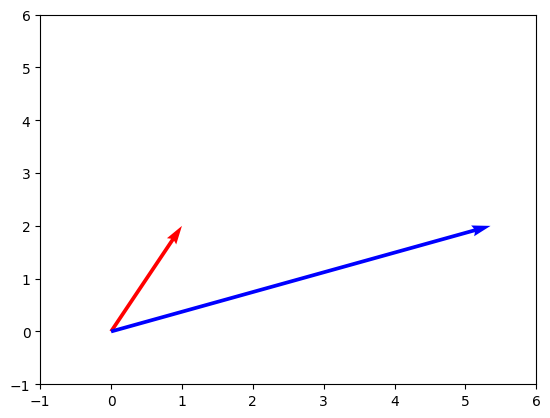

In [ ]:
# Plot the vector x and the vector Mx

plt.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1, color='r', label='x')
Mx = M @ x
plt.quiver(0, 0, Mx[0], Mx[1], angles='xy', scale_units='xy', scale=1, color='b', label='Mx')
plt.xlim(-1, 6)
plt.ylim(-1, 6)

In [2]:
try:
    from animations.rotation import show_rotation
except ImportError:
    from repo.animations.rotation import show_rotation

fig = show_rotation()
fig.show()

## Unfinished Topics

## Long and Wide Matrices

Long matrices (more rows than columns) also represent linear functions but they map a lower-dimensional vector to a higher dimensional one. Wide matrices (less rows than columns) do the opposite: they map a vector to a lower dimensional space.

$$
\begin{bmatrix}
1 & 2 \\
0 & 2 \\
3 & 1 \\
\end{bmatrix}
\underset{\in \mathbb{R}^2} {
    \begin{bmatrix}
0 \\
2 \\
\end{bmatrix}
}


= 0 \begin{bmatrix} 1 \\ 0 \\ 3 \end{bmatrix} + 2 \begin{bmatrix} 2 \\ 2 \\ 1 \end{bmatrix}
= \begin{bmatrix} 4 \\ 4 \\ 2 \end{bmatrix} \in \mathbb{R}^3
$$

Consider the matrix:

$$
A = \begin{bmatrix}
1 & 2 & -1 \\
0 & 2 & 2 \\
\end{bmatrix} \in \mathbb{R}^{3 \times 2}
$$

and the vector:

$$
x = \begin{bmatrix} 0 \\ 2 \\ 1 \end{bmatrix} \in \mathbb{R}^2
$$

The action $Ax$ can be written as a linear combination of the columns of $A$:

$$
Ax = 0 \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 2 \begin{bmatrix} 2 \\ 2 \end{bmatrix} + 1 \begin{bmatrix} -1 \\ 2 \end{bmatrix} = \begin{bmatrix} 3 \\ 6 \end{bmatrix} \in \mathbb{R}^2
$$
.